# Healpy

https://irsa.ipac.caltech.edu/Missions/planck.html 


https://pla.esac.esa.int/#home

In [1]:
# let us first start by importing the main libraries we'll be needing

import healpy as hp
import numpy as np

import matplotlib.pyplot as plt 
import pandas as pd


## Nside manipulation

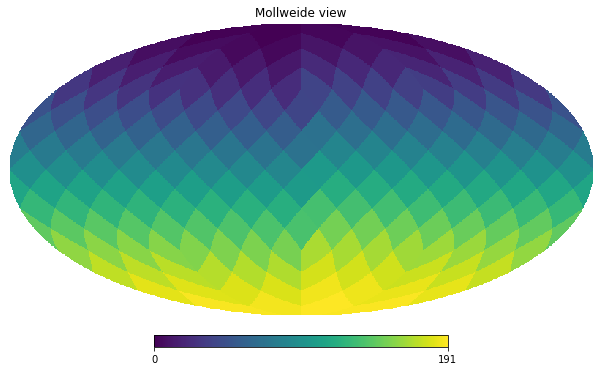

In [2]:
map_ex = np.asarray(list(range(192)))
hp.mollview(map_ex, nest=False)


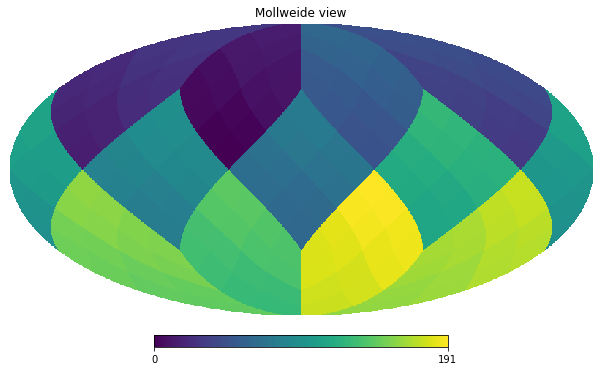

In [3]:
hp.mollview(map_ex, nest=True)

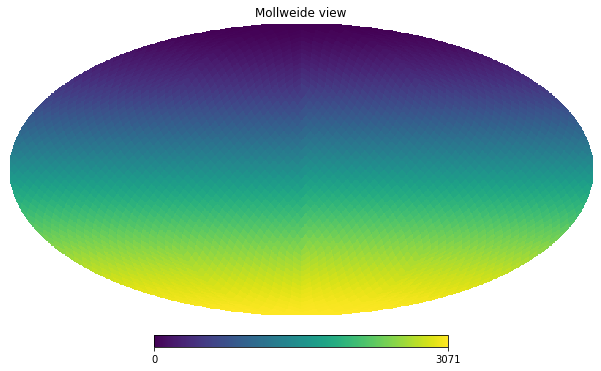

In [48]:
map_ex = np.asarray(list(range(3072)))
hp.mollview(map_ex, nest=False)


## Map fields

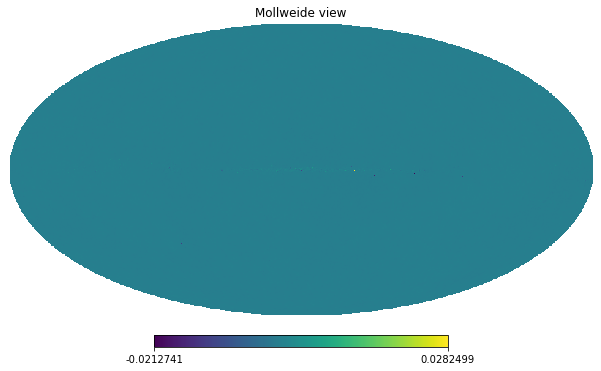

In [9]:
map_cmb = hp.read_map('/share/storage1/simulations/horizon/cmb-map/COM_CMB_IQU-commander_2048_R3.00_full.fits'
                     , field=0, nest=True)


hp.mollview(map_cmb, nest=True)


In [6]:
map_cmb.shape

(50331648,)

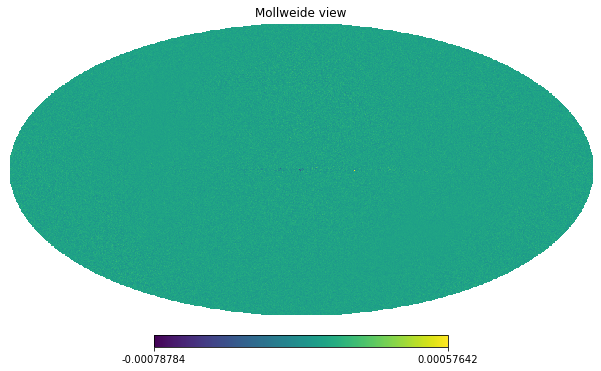

In [11]:
map_cmb_field = hp.read_map('/share/storage1/simulations/horizon/cmb-map/COM_CMB_IQU-commander_2048_R3.00_full.fits'
                            ,field=2)


hp.mollview(map_cmb_field, nest=False)

### We can control the minimum and maximum

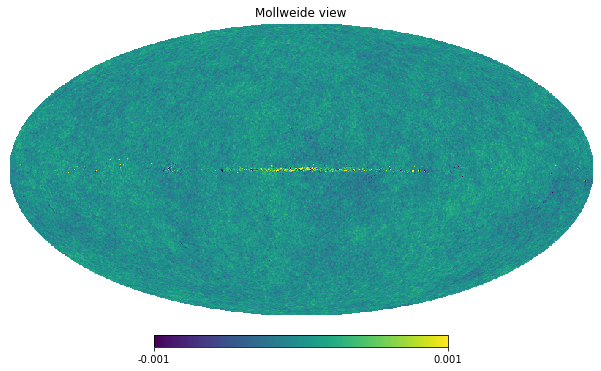

In [7]:
hp.mollview(map_cmb, nest=True, min=-0.001 , max=0.001)


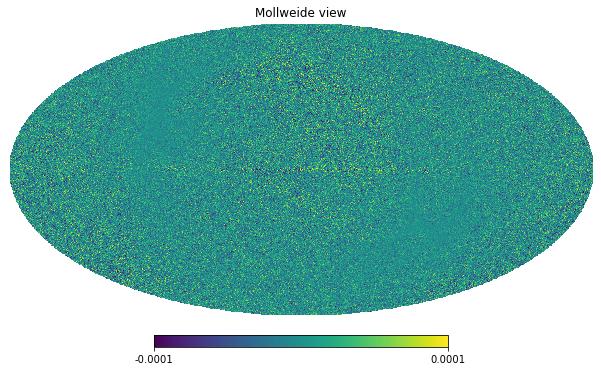

In [23]:

hp.mollview(map_cmb_field, nest=False, min= -0.0001, max=0.0001)



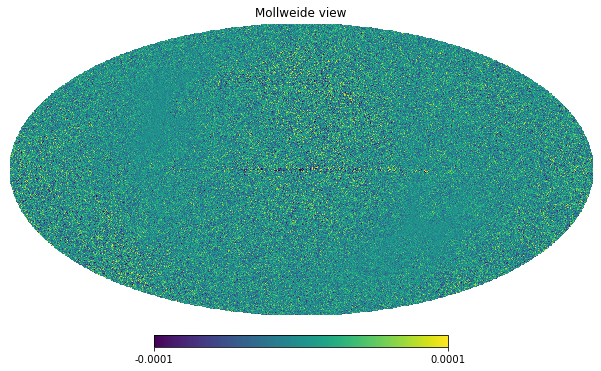

In [26]:
map_cmb_field_2 = hp.read_map('/share/storage1/simulations/horizon/cmb-map/COM_CMB_IQU-commander_2048_R3.00_full.fits'
                            ,field=2)


hp.mollview(map_cmb_field_2, nest=False, min= -0.0001, max=0.0001)

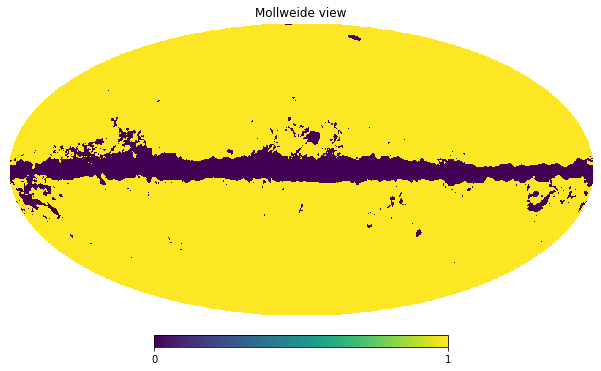

In [28]:
map_cmb_field_3 = hp.read_map('/share/storage1/simulations/horizon/cmb-map/COM_CMB_IQU-commander_2048_R3.00_full.fits'
                            ,field=3)


hp.mollview(map_cmb_field_3, nest=False)

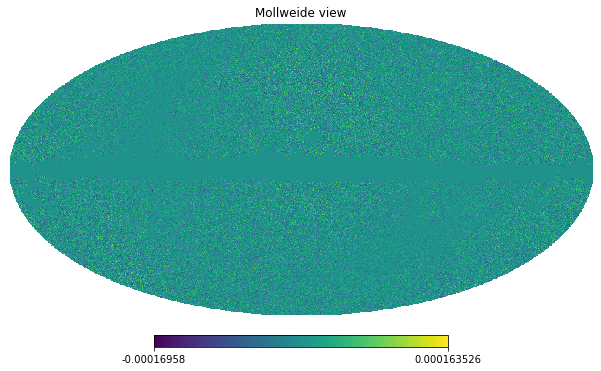

In [51]:
masked_map = map_cmb_field_2 * map_cmb_field_3
hp.mollview(masked_map , nest=False)



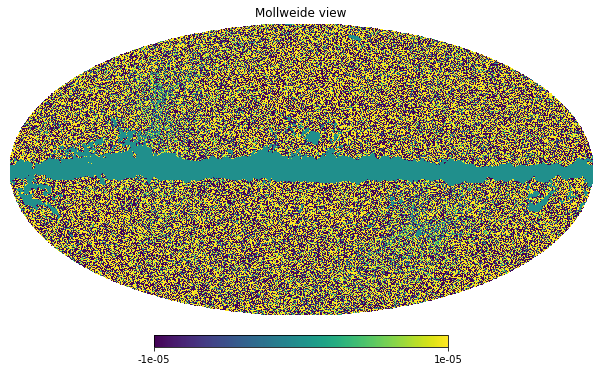

In [52]:
hp.mollview(masked_map , nest=False, min= -0.00001, max=0.00001)

## Nside manipulation on maps

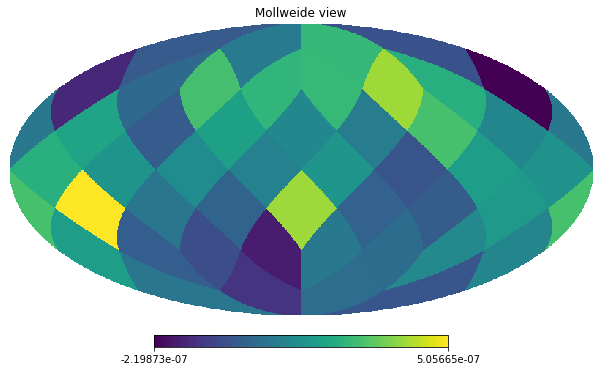

In [57]:
nside_change =  hp.pixelfunc.ud_grade(masked_map, nside_out =2, pess=False, order_in='RING', order_out=None, power=None, dtype=None)

hp.mollview(nside_change, nest=False)


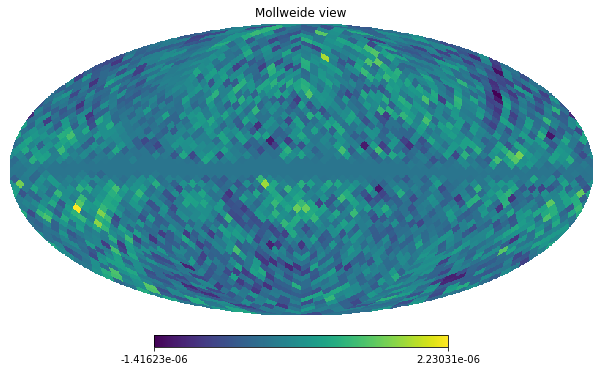

In [58]:
nside_change =  hp.pixelfunc.ud_grade(masked_map, nside_out = 16, pess=False, order_in='RING', order_out=None, power=None, dtype=None)

hp.mollview(nside_change, nest=False)


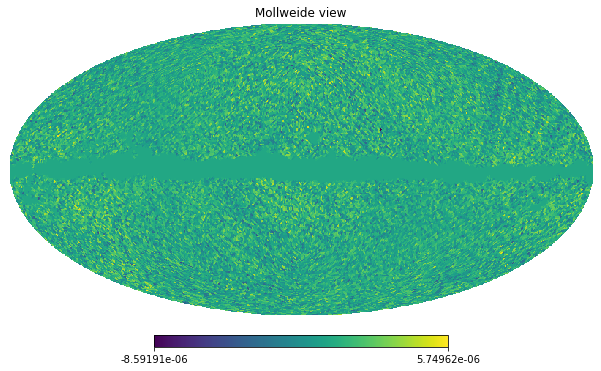

In [60]:
nside_change =  hp.pixelfunc.ud_grade(masked_map, nside_out = 64, pess=False, order_in='RING', order_out=None, power=None, dtype=None)

hp.mollview(nside_change, nest=False)


## Calculate $C_{\ell}$

In [80]:
cls_from_map = hp.sphtfunc.anafast(map_cmb, map2=None, nspec=None, lmax=None, mmax=None, iter=3, 
                                       alm=False, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)


cls_from_masked_map = hp.sphtfunc.anafast(map_cmb*map_cmb_field_3, map2=None, nspec=None, lmax=None, mmax=None, iter=3, 
                                       alm=False, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)



In [74]:
ell = np.arange(2, cls_from_masked_map.shape[0])


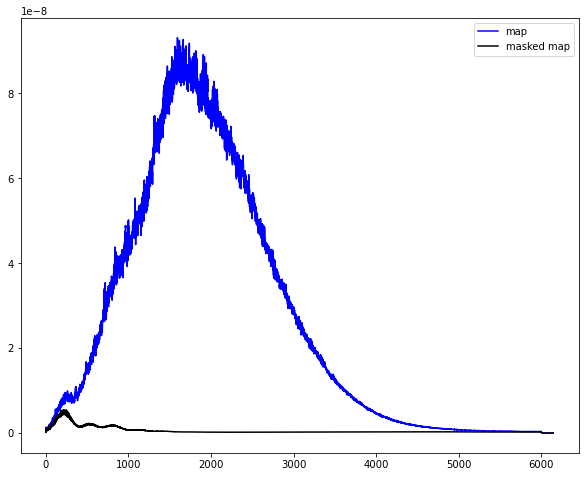

In [86]:
import pylab
plt.figure(figsize = (10,8))

plt.plot(ell, ell*(ell+1)*cls_from_map[2:]/(2*np.pi), 'b', label = 'map')
plt.plot(ell, ell*(ell+1)*cls_from_masked_map[2:]/(2*np.pi), 'k', label = 'masked map')

pylab.legend(loc='best')
plt.show()

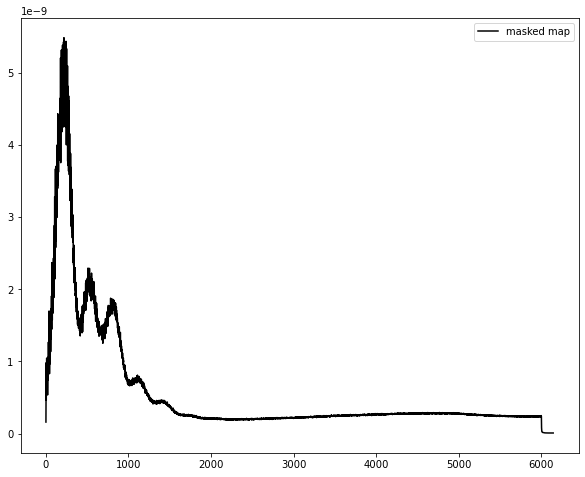

In [87]:
import pylab
plt.figure(figsize = (10,8))

plt.plot(ell, ell*(ell+1)*cls_from_masked_map[2:]/(2*np.pi), 'k', label = 'masked map')

pylab.legend(loc='best')
plt.show()

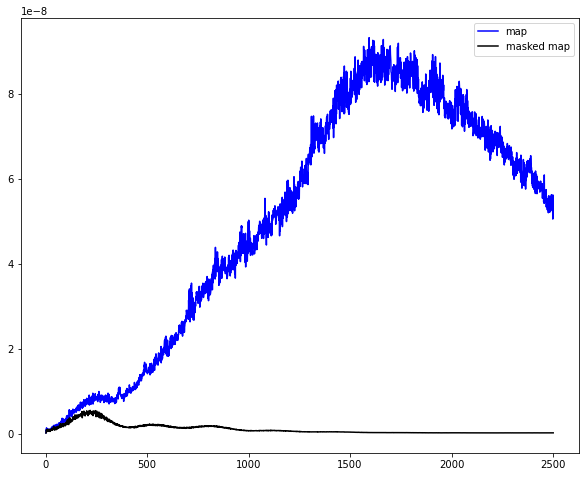

In [82]:
import pylab
plt.figure(figsize = (10,8))

plt.plot(ell[:2500], ell[:2500]*(ell[:2500]+1)*cls_from_map[2:2500+2]/(2*np.pi), 'b', label = 'map')
plt.plot(ell[:2500], ell[:2500]*(ell[:2500]+1)*cls_from_masked_map[2:2500+2]/(2*np.pi), 'k', label = 'masked map')

pylab.legend(loc='best')
plt.show()

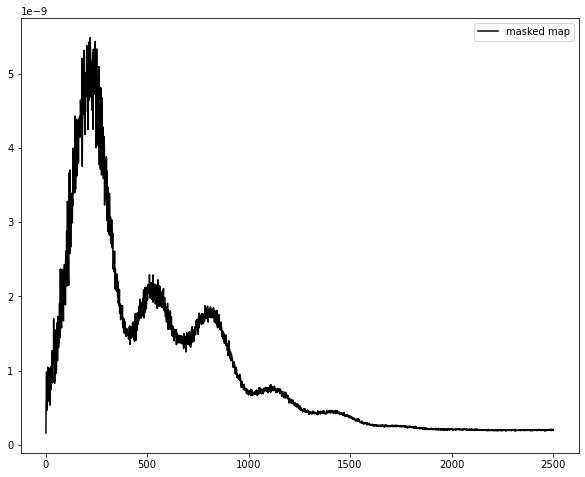

In [84]:
plt.figure(figsize = (10,8))

plt.plot(ell[:2500], ell[:2500]*(ell[:2500]+1)*cls_from_masked_map[2:2500+2]/(2*np.pi), 'k', label = 'masked map')

pylab.legend(loc='best')
plt.show()

## Cross correlation using using $C_{\ell}$ and anafast

In [104]:
crossed_map = hp.sphtfunc.anafast(map_cmb*map_cmb_field_3, map2=map_cmb*map_cmb_field_3, nspec=None, lmax=None, mmax=None, iter=3, 
                                       alm=False, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)


## Write a map

In [109]:
map_cmb*map_cmb_field_3

array([-1.4912881e-04, -1.1455056e-04, -9.0563422e-05, ...,
        1.1307045e-04,  9.4987285e-05,  1.0467269e-04], dtype=float32)

In [113]:
# Writing a map


writing_map = hp.fitsfunc.write_map('map_test1.fits', map_cmb*map_cmb_field_3,
                            coord=None, partial=False, column_names=None
                            , column_units=None, extra_header=())





setting the output map dtype to [dtype('float32')]


In [114]:
read_map = hp.read_map('map_test1.fits')


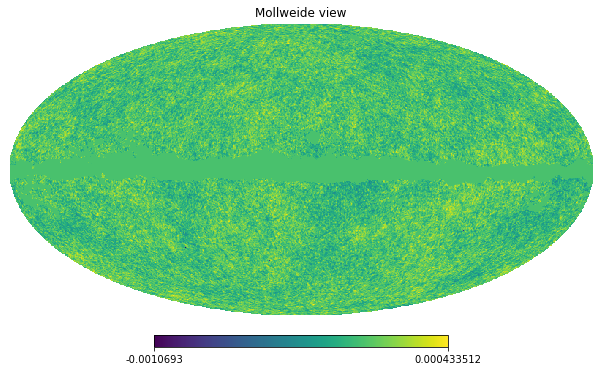

In [115]:
hp.mollview(read_map)

# Nbodykit


https://nbodykit.readthedocs.io/en/latest/

**data from**:

https://cosmology.alcf.anl.gov/

In [121]:
from nbodykit.lab import *
import h5py


In [122]:
catalog1 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.2/halo/halo.z0.2_11.4_11.5.hdf5')
f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.2/halo/halo.z0.2_11.4_11.5.hdf5', 'r')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
    
catalog1['Position'] = a1
catalog1['Mass'] = np.asarray(f2.get('mass')) 


In [123]:
catalog1['Position']

dask.array<array, shape=(55800748, 3), dtype=float64, chunksize=(100000, 3), chunktype=numpy.ndarray>

In [124]:
np.asarray(catalog1['Position'])

array([[ 143.00891562, 2663.80033011, 1889.4161374 ],
       [ 985.52659483,  128.3900773 , 1939.35696739],
       [ 293.74375285, 2259.94630167, 2112.10457816],
       ...,
       [  57.99117451,  572.08571548,  124.28430271],
       [ 108.85556633, 3013.77473594,  124.50272954],
       [ 883.21804585, 2705.77677759,  126.30644783]])

## Visualization and manipulation of data

after dividing the data into mesh object

In [135]:
from matplotlib import pyplot as plt
from nbodykit import style, setup_logging
plt.style.use(style.notebook)

BoxSize = np.asarray(catalog1['Position']).max()

mesh = catalog1.to_mesh(Nmesh=128, BoxSize = BoxSize , window = 'cic',position='Position')

density = mesh.paint(mode='real')



/home/rahima/anaconda3/envs/nbody/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  import sys


## Halo overdensity field

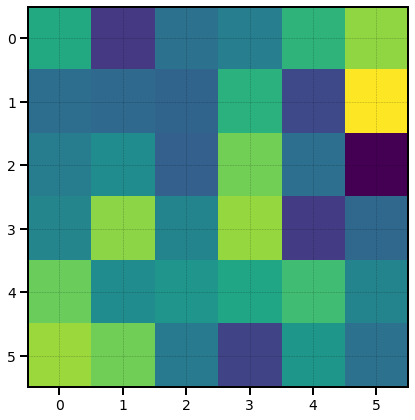

In [139]:
density_plot = density.preview(Nmesh=6, axes=(0,1))

plt.imshow(density_plot)
plt.show()

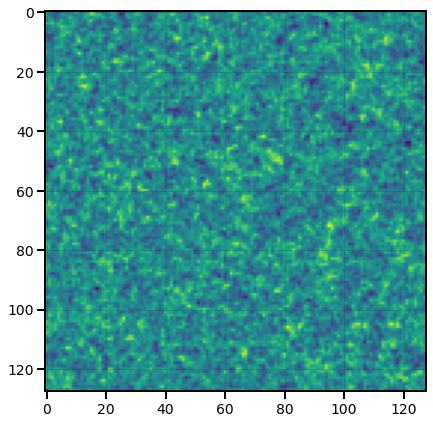

In [136]:
plt.imshow(density.preview(axes=[0,1]))

## Bias and matter overdensity field

In [141]:
##################### Colossus bias #####################
# print('%.6e'%m)  print scientific
import numpy as np
from colossus.lss import bias
from colossus.cosmology import cosmology

m = np.asarray(10**15)

# m = np.asarray(combined_wmap_original['Mass'])
params = {'flat':True,'H0':72.0,'Om0':0.26,'Ob0':0.049,'sigma8':0.79,'ns':0.96, 'w0':0}
cosmology.setCosmology('HR4',params)

b = bias.haloBias(m, model='tinker10',z = 0.2, mdef = '200m')
b

7.711718121724871

In [142]:
b = bias.haloBias(10**11, model='tinker10',z = 0.2, mdef = '200m')
b

0.7581149028852648

In [143]:
b = bias.haloBias(np.asarray(catalog1['Mass']), model='tinker10',z = 0.2, mdef = '200m')
b.mean()

0.8236360680236293

## Halo power spectrum

/home/rahima/anaconda3/envs/nbody/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.01, 0.6)

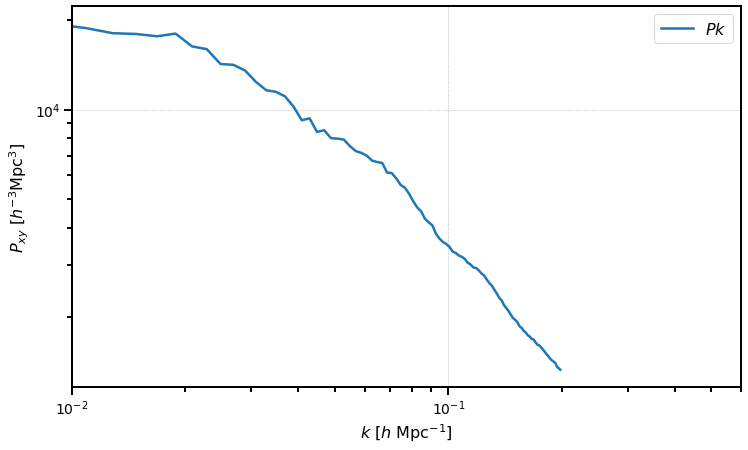

In [140]:
from nbodykit.algorithms.fftpower import project_to_basis

catalog2 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.2/halo/halo.z0.2_11.5_11.6.hdf5')
f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.2/halo/halo.z0.2_11.5_11.6.hdf5', 'r')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
    
catalog2['Position'] = a1
catalog2['Mass'] = np.asarray(f2.get('mass')) 


##### read combined snapshot catalogs ######
combined_catalogs = transform.ConcatenateSources(catalog1,catalog2, 
                                    columns=['Position', 'Mass'])

#### pk and k ########

power_original = FFTPower(combined_catalogs, mode='1d', Nmesh=200, BoxSize = 3150)
pk = power_original.power['power'] 
k = power_original.power['k']

plt.loglog(k, pk , label=r"$Pk$")

plt.legend(loc='best', ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P_{xy}$ [$h^{-3} \mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)


## Removing shotnoise

/home/rahima/anaconda3/envs/nbody/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.01, 0.6)

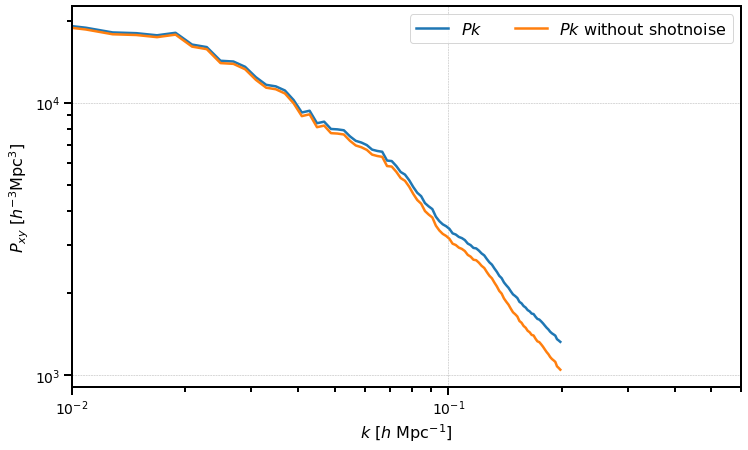

In [146]:
pk_shotnoise = pk.real - power_original.attrs['shotnoise']

plt.loglog(k, pk , label=r"$Pk$")
plt.loglog(k, pk_shotnoise , label=r"$Pk$ without shotnoise")

plt.legend(loc='best', ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P_{xy}$ [$h^{-3} \mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)

## exmple with all the snapshots

In [147]:
catalog1 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.4_11.5.hdf5')
catalog2 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.5_11.6.hdf5')
catalog3 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.6_11.7.hdf5')
catalog4 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.7_11.8.hdf5')
catalog5 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.8_11.9.hdf5')
catalog6 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.9_12.0.hdf5')
catalog7 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.0_12.1.hdf5')
catalog8 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.1_12.2.hdf5')
catalog9 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.2_12.3.hdf5')
catalog10 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.3_12.4.hdf5')
catalog11 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.4_12.5.hdf5')
catalog12 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.5_12.6.hdf5')
catalog13 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.6_12.7.hdf5')
catalog14 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.7_12.8.hdf5')
catalog15 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.8_12.9.hdf5')
catalog16 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.9_13.0.hdf5')
catalog17 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.0_13.1.hdf5')
catalog18 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.1_13.2.hdf5')
catalog19 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.2_13.3.hdf5')
catalog20 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.3_13.4.hdf5')
catalog21 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.4_13.5.hdf5')
catalog22 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.5_13.6.hdf5')
catalog23 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.6_13.7.hdf5')
catalog24 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.7_13.8.hdf5')
catalog25 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.8_13.9.hdf5')
catalog26 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.9_14.0.hdf5')
catalog27 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.0_14.1.hdf5')
catalog28 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.1_14.2.hdf5')
catalog29 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.2_14.3.hdf5')
catalog30 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.3_14.4.hdf5')
catalog31 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.4_14.5.hdf5')
catalog32 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.5_14.6.hdf5')
catalog33 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.6_14.7.hdf5')
catalog34 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.7_14.8.hdf5')
catalog35 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.8_14.9.hdf5')
catalog36 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.9_15.0.hdf5')
catalog37 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.0_15.1.hdf5')
catalog38 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.1_15.2.hdf5')
catalog39 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.2_15.3.hdf5')
catalog40 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.3_15.4.hdf5')
catalog41 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.4_15.5.hdf5')
catalog42 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.5_15.6.hdf5')

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.4_11.5.hdf5', 'r')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
    
catalog1['Position'] = a1
catalog1['Mass'] = np.asarray(f2.get('mass')) 


f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.5_11.6.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog2['Position'] = a1
catalog2['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.6_11.7.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog3['Position'] = a1
catalog3['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.7_11.8.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog4['Position'] = a1
catalog4['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.8_11.9.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog5['Position'] = a1
catalog5['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.9_12.0.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog6['Position'] = a1
catalog6['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.0_12.1.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog7['Position'] = a1
catalog7['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.1_12.2.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog8['Position'] = a1
catalog8['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.2_12.3.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog9['Position'] = a1
catalog9['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.3_12.4.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog10['Position'] = a1
catalog10['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.4_12.5.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog11['Position'] = a1
catalog11['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.5_12.6.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog12['Position'] = a1
catalog12['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.6_12.7.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog13['Position'] = a1
catalog13['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.7_12.8.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog14['Position'] = a1
catalog14['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.8_12.9.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog15['Position'] = a1
catalog15['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.9_13.0.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog16['Position'] = a1
catalog16['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.0_13.1.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog17['Position'] = a1
catalog17['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.1_13.2.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog18['Position'] = a1
catalog18['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.2_13.3.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog19['Position'] = a1
catalog19['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.3_13.4.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog20['Position'] = a1
catalog20['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.4_13.5.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog21['Position'] = a1
catalog21['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.5_13.6.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog22['Position'] = a1
catalog22['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.6_13.7.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog23['Position'] = a1
catalog23['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.7_13.8.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog24['Position'] = a1
catalog24['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.8_13.9.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog25['Position'] = a1
catalog25['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.9_14.0.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog26['Position'] = a1
catalog26['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.0_14.1.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog27['Position'] = a1
catalog27['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.1_14.2.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog28['Position'] = a1
catalog28['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.2_14.3.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog29['Position'] = a1
catalog29['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.3_14.4.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog30['Position'] = a1
catalog30['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.4_14.5.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog31['Position'] = a1
catalog31['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.5_14.6.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog32['Position'] = a1
catalog32['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.6_14.7.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog33['Position'] = a1
catalog33['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.7_14.8.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog34['Position'] = a1
catalog34['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.8_14.9.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog35['Position'] = a1
catalog35['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.9_15.0.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog36['Position'] = a1
catalog36['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.0_15.1.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog37['Position'] = a1
catalog37['Mass'] = np.asarray(f2.get('mass'))


f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.1_15.2.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog38['Position'] = a1
catalog38['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.2_15.3.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog39['Position'] = a1
catalog39['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.3_15.4.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog40['Position'] = a1
catalog40['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.4_15.5.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog41['Position'] = a1
catalog41['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.5_15.6.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog42['Position'] = a1
catalog42['Mass'] = np.asarray(f2.get('mass'))


In [150]:
##### read combined catalogs ######
combined_wmap_original = transform.ConcatenateSources(catalog1,catalog2,catalog3,catalog4,catalog5,catalog6,catalog7  
                                                      ,catalog8, catalog9, catalog10, catalog11, catalog12, catalog13,catalog14,
                                                      catalog15, catalog16, catalog17, catalog18,catalog19, catalog20, catalog21, 
                                                      catalog22, catalog23,catalog24, catalog25, catalog26, catalog27, catalog28,
                                                      catalog29, catalog30, catalog32, catalog33,catalog34, catalog35, catalog36, 
                                                      catalog37, catalog38,catalog39, catalog40, catalog41, catalog42, 
                                                      columns=['Position', 'Mass'])

#### pk and k ########

power_original = FFTPower(combined_wmap_original, mode='1d', Nmesh=200, BoxSize = 3150)
power_catalog_original = power_original.power['power'] 
k_catalog_original = power_original.power['k']
power_catalog_original_sh = power_catalog_original.real - power_original.attrs['shotnoise']


/home/rahima/anaconda3/envs/nbody/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


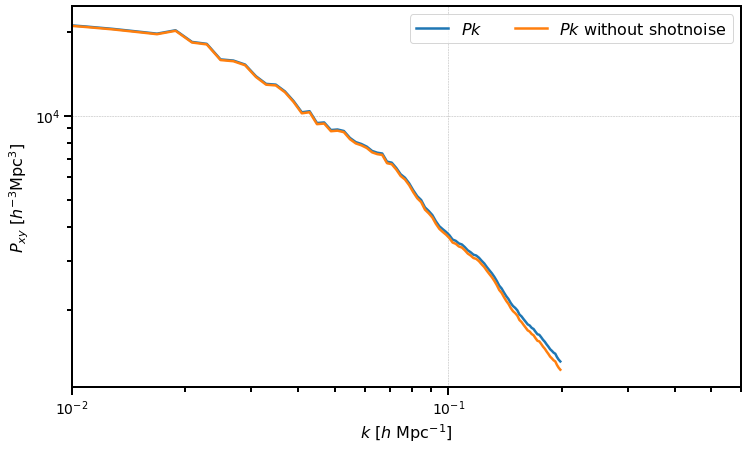

In [151]:
pk_shotnoise = pk.real - power_original.attrs['shotnoise']

plt.loglog(k_catalog_original, power_catalog_original , label=r"$Pk$")
plt.loglog(k_catalog_original, power_catalog_original_sh , label=r"$Pk$ without shotnoise")

plt.legend(loc='best', ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P_{xy}$ [$h^{-3} \mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)
plt.show()

## Filters

#### Gaussian and Top hat

In [159]:
from nbodykit.filters import Gaussian

test = mesh.Gaussian(5)

AttributeError: 'CatalogMesh' object has no attribute 'Gaussian'

In [158]:
test

## Cosmological calculations

In [12]:
from nbodykit.lab import cosmology

planck15 = cosmology.Planck15
wmap5 = cosmology.WMAP5
wmap7 = cosmology.WMAP7


In [163]:
planck15.sigma8

0.8158116144901115

In [164]:
wmap5.h

0.7020000000000001

In [165]:
wmap7.n_s

0.967

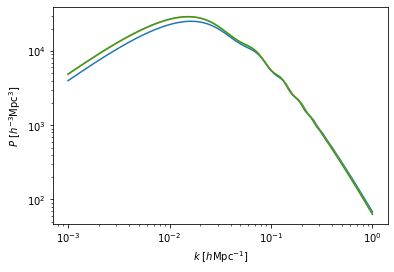

In [13]:
P_planck = cosmology.LinearPower(planck15, redshift=0., transfer='CLASS')
P_wmap5 = cosmology.LinearPower(wmap5, redshift=0., transfer='CLASS')
P_wmap7 = cosmology.LinearPower(wmap7, redshift=0., transfer='CLASS')

k = np.logspace(-3, 0, 100)
plt.loglog(k, P_planck(k), label = 'planck15')
plt.loglog(k, P_wmap5(k), label = 'wmap5')
plt.loglog(k, P_wmap7(k), label = 'wmap7')

plt.xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$P$ $[h^{-3} \mathrm{Mpc}^{3}]$")
plt.show()
